In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Set features
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
plt.rcParams['figure.figsize']=(10,6)
sns.set_style('whitegrid')

In [3]:
# Importing the dataset
e_commerce = pd.read_csv('e_commerce.csv', parse_dates=['InvoiceDate'], encoding='latin-1')

In [4]:
# Print the first five rows
e_commerce.head()

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country,Quantity,UnitPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,17850.00,United Kingdom,6,2.55
1,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,17850.00,United Kingdom,6,3.39
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,17850.00,United Kingdom,8,2.75
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,17850.00,United Kingdom,6,3.39
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,17850.00,United Kingdom,6,3.39


In [5]:
# Print the last five rows
e_commerce.tail()

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country,Quantity,UnitPrice
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,2011-12-09 12:50:00,12680.00,France,12,0.85
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,2011-12-09 12:50:00,12680.00,France,6,2.10
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,2011-12-09 12:50:00,12680.00,France,4,4.15
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,2011-12-09 12:50:00,12680.00,France,4,4.15
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,2011-12-09 12:50:00,12680.00,France,3,4.95


In [6]:
# Print the shape
e_commerce.shape

(541909, 8)

In [7]:
# Get the column names
e_commerce.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'CustomerID',
       'Country', 'Quantity', 'UnitPrice'],
      dtype='object')

In [8]:
# Get the data types
e_commerce.dtypes

InvoiceNo              object
StockCode              object
Description            object
InvoiceDate    datetime64[ns]
CustomerID            float64
Country                object
Quantity                int64
UnitPrice             float64
dtype: object

In [9]:
# Get information about the dataset
e_commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   InvoiceDate  541909 non-null  datetime64[ns]
 4   CustomerID   406829 non-null  float64       
 5   Country      541909 non-null  object        
 6   Quantity     541909 non-null  int64         
 7   UnitPrice    541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
# Get the missing values
e_commerce.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
InvoiceDate         0
Country             0
Quantity            0
UnitPrice           0
dtype: int64

In [11]:
# Drop missing values
e_commerce.dropna(inplace=True)
e_commerce.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
InvoiceDate    0
CustomerID     0
Country        0
Quantity       0
UnitPrice      0
dtype: int64

In [12]:
e_commerce.shape

(406829, 8)

In [13]:
# Calculate the sales price
e_commerce['SalesPrice'] = e_commerce['UnitPrice'] * e_commerce['Quantity']

In [14]:
# Extract date features from datetime
e_commerce['Year']=pd.to_datetime(e_commerce['InvoiceDate']).dt.year
e_commerce['Month']=pd.to_datetime(e_commerce['InvoiceDate']).dt.month
e_commerce['Week']=pd.to_datetime(e_commerce['InvoiceDate']).dt.isocalendar().week
e_commerce['DayOfWeek'] = e_commerce['InvoiceDate'].dt.day_name()
e_commerce['Quarter']=pd.to_datetime(e_commerce['InvoiceDate']).dt.quarter
e_commerce['Hour'] = e_commerce['InvoiceDate'].dt.hour
e_commerce["Day"] = e_commerce['InvoiceDate'].dt.day

In [15]:
# Convert Week and CustomerID to their appropriate dtypes
e_commerce['Week'] = e_commerce['Week'].astype('int64')
e_commerce['CustomerID'] = e_commerce['CustomerID'].astype('int64')

In [16]:
# Basic descriptive statistics for numerical columns
e_commerce.loc[:, 'Quantity':'SalesPrice'].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.00,12.06,248.69,-80995.00,2.00,5.00,12.00,80995.00
UnitPrice,406829.00,3.46,69.32,0.00,1.25,1.95,3.75,38970.00
SalesPrice,406829.00,20.40,427.59,-168469.60,4.20,11.10,19.50,168469.60


In [17]:
# Basic descriptive statistics for categorical columns
e_commerce.describe(include='object').T

,count,unique,top,freq
InvoiceNo,406829,22190,576339,542
StockCode,406829,3684,85123A,2077
Description,406829,3896,WHITE HANGING HEART T-LIGHT HOLDER,2070
Country,406829,37,United Kingdom,361878
DayOfWeek,406829,6,Thursday,82374


In [18]:
# Total Quantity Sold
Total_Quantity = e_commerce['Quantity'].sum()
Total_Quantity

4906888

+ The total Quantity Sold is **4,906,888**

### Sales analysis

In [19]:
# Total Sales
Total_sales = e_commerce['SalesPrice'].sum().round()
Total_sales

8300066.0

+ The total Sales revenue is **8,300,066**.

In [20]:
# Total Sales by year
TotalSales_by_year = e_commerce.groupby('Year')['SalesPrice'].sum().round().reset_index()
TotalSales_by_year

,Year,SalesPrice
0,2010,554604.00
1,2011,7745462.00


### Observation:
+ There is a substantial increase in sales revenue from 2010 to 2011. The sales revenue has grown from **554,604** in 2010 to **7,745,462** in 2011

In [21]:
# Total sales by month
TotalSales_by_month = e_commerce.groupby('Month')['SalesPrice'].sum().round().reset_index()
TotalSales_by_month

,Month,SalesPrice
0,1,475074.00
1,2,436546.00
2,3,579965.00
3,4,426048.00
4,5,648251.00
5,6,608013.00
6,7,574238.00
7,8,616368.00
8,9,931440.00
9,10,974604.00


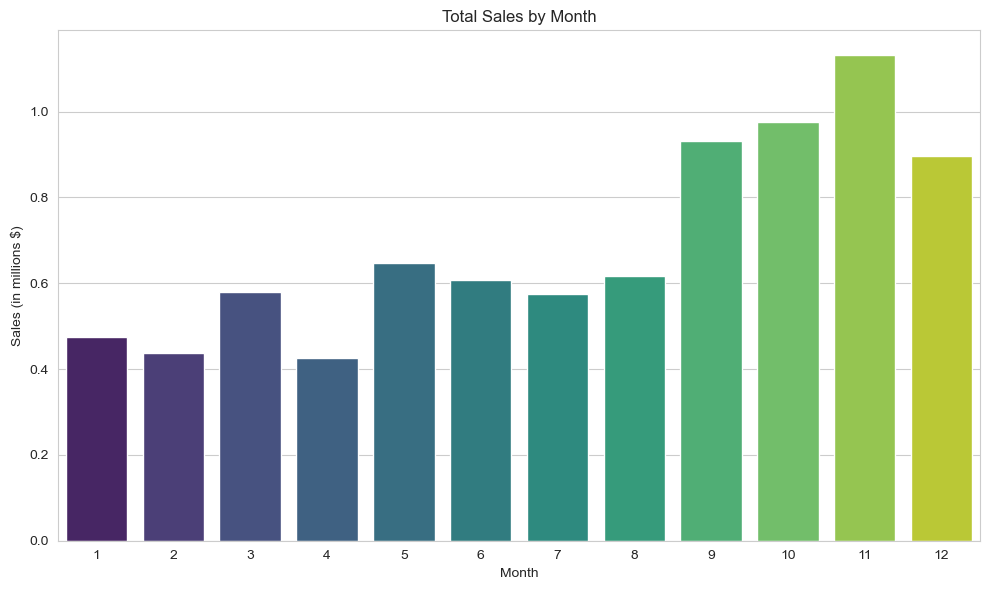

In [22]:
# Plot 
sns.barplot(x=TotalSales_by_month['Month'], y=TotalSales_by_month['SalesPrice']/1000000, palette="viridis")
plt.xlabel('Month')
plt.ylabel('Sales (in millions $)')
plt.title('Total Sales by Month')
plt.tight_layout()
plt.show()

### Observations: Trends and Patterns:

+ **Seasonal Variation:** The sales fiugres exhibit some seasonal variation throughout the year. For instance, sales seem to increase in March, May, June, October, and November, showing potential peaks in customer demand during these months.

+ **End of Year Increase:** Sales reach a peak in November (Month 11) and then decrease slightly in December (Month 12). This pattern could be attributed to the holiday season, where sales typically rise due to increased shopping activities during festive periods.

+ **Sales Decline:** Months like February (Month 2) and April (Month 4) show relatively lower sales amounts compared to other months, showing a possible decline in customer spending during these periods.

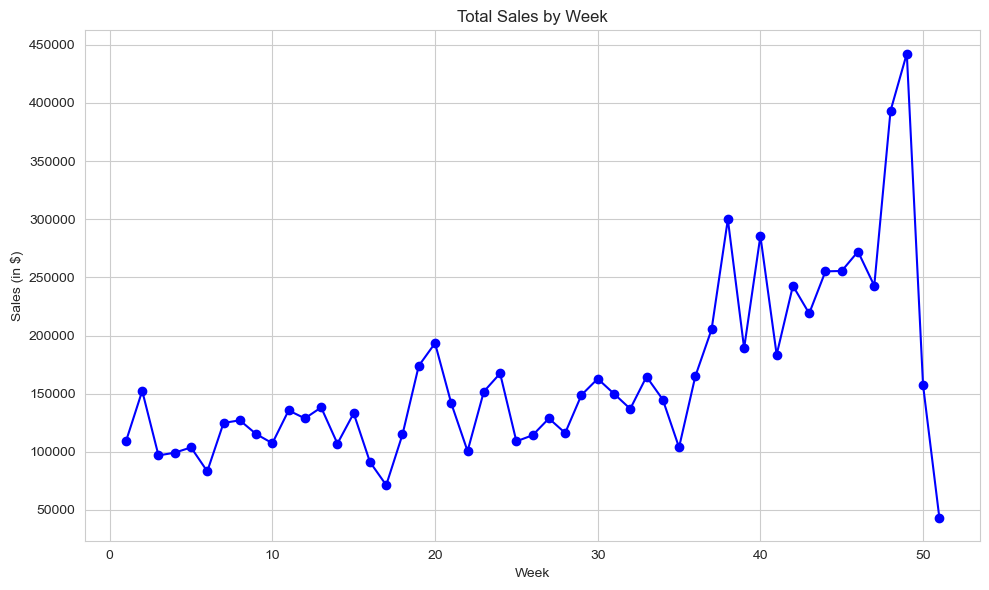

In [23]:
# Total sales by Week
TotalSales_by_week = e_commerce.groupby('Week')['SalesPrice'].sum().round().reset_index()
TotalSales_by_week

# Plot 
plt.plot(TotalSales_by_week['Week'],TotalSales_by_week['SalesPrice'], marker='o', linestyle='-', color='blue')
plt.xlabel('Week')
plt.ylabel('Sales (in $)')
plt.title('Total Sales by Week')
plt.tight_layout()
plt.show()

### Observation:
+ The total sales amount for each week, indicating the company's performance over time. 

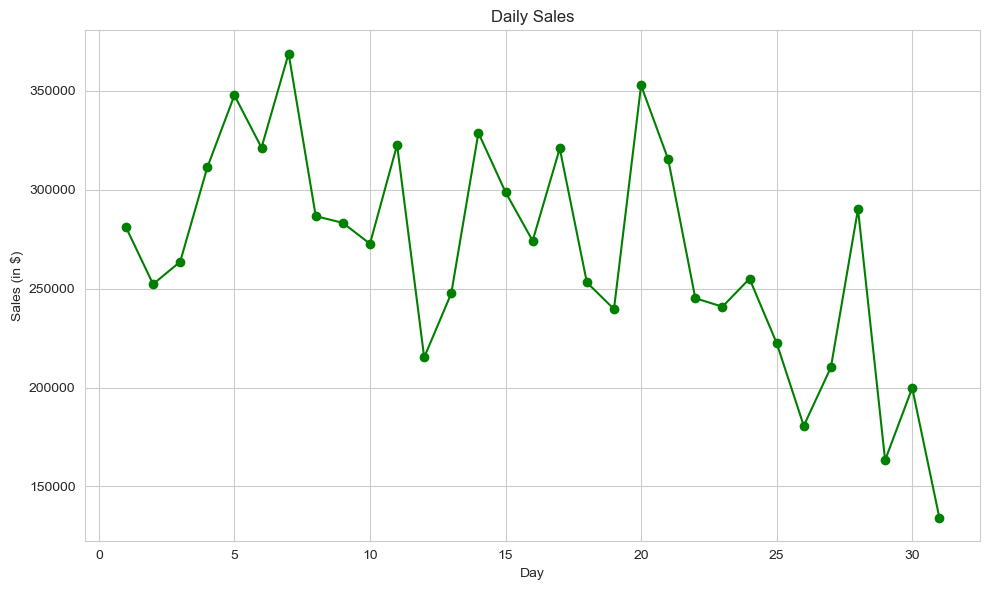

In [24]:
# Total sales by Day
TotalSales_by_day = e_commerce.groupby('Day')['SalesPrice'].sum().round().reset_index()

# Plot 
plt.plot(TotalSales_by_day['Day'],TotalSales_by_day['SalesPrice'], marker='o', linestyle='-', color='green')
plt.xlabel('Day')
plt.ylabel('Sales (in $)')
plt.title('Daily Sales')
plt.tight_layout()
plt.show()

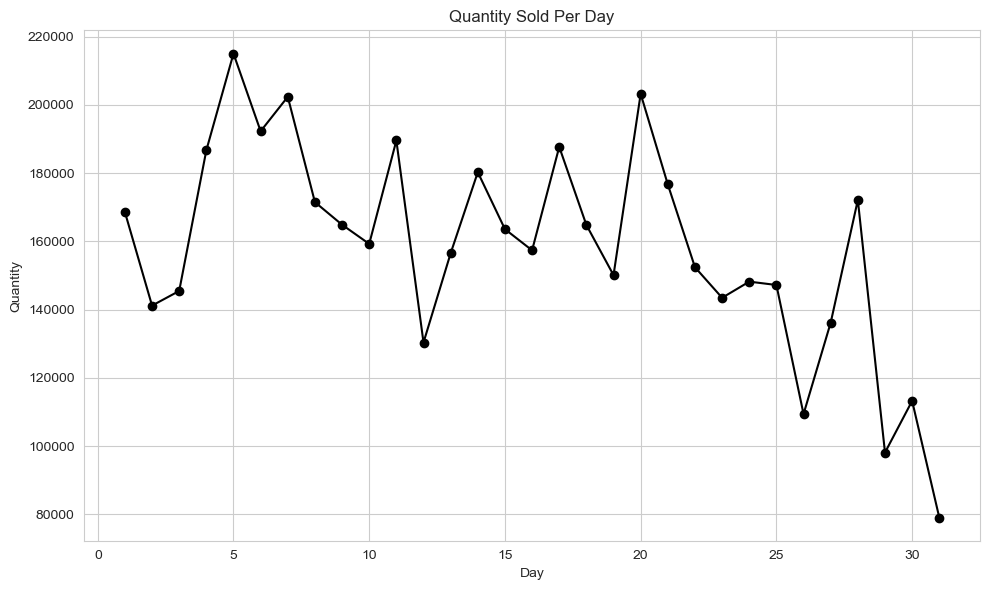

In [25]:
# Total sales by Day
Totalquantity_by_day = e_commerce.groupby('Day')['Quantity'].sum().round().reset_index()

# Plot 
plt.plot(Totalquantity_by_day['Day'],Totalquantity_by_day['Quantity'], marker='o', linestyle='-', color='black')
plt.xlabel('Day')
plt.ylabel('Quantity')
plt.title('Quantity Sold Per Day')
plt.tight_layout()
plt.show()

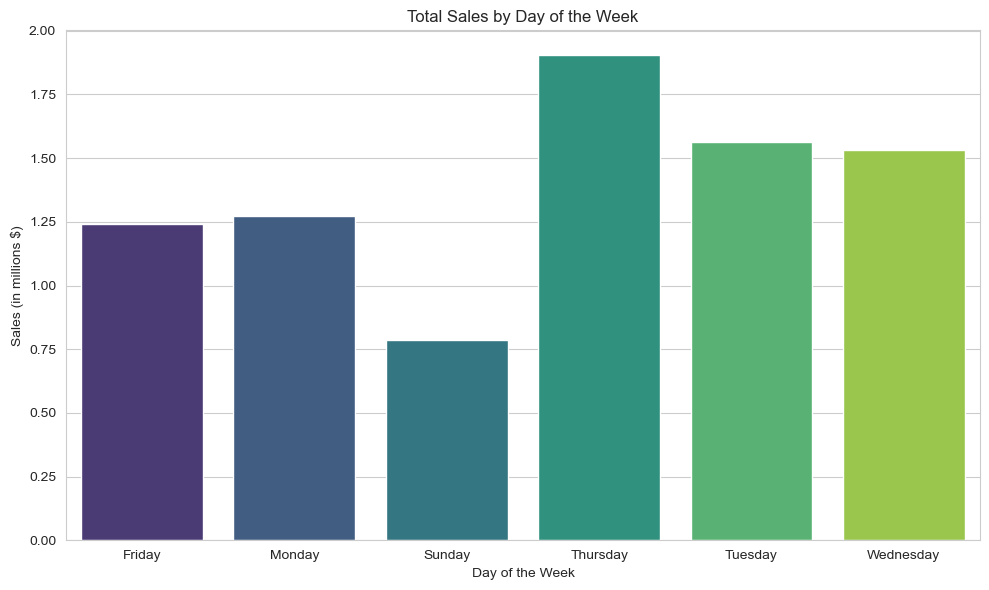

In [26]:
# Total sales by Weekday
TotalSales_by_weekday = e_commerce.groupby('DayOfWeek')['SalesPrice'].sum().round().reset_index()
TotalSales_by_weekday

# Plot 
sns.barplot(x=TotalSales_by_weekday['DayOfWeek'], y=TotalSales_by_weekday['SalesPrice']/1000000, palette="viridis")
plt.xlabel('Day of the Week')
plt.ylabel('Sales (in millions $)')
plt.title('Total Sales by Day of the Week')
plt.tight_layout()
plt.show()

### Observations:
+ **Thursday** has the highest sales amount, indicating that it is the most profitable day of the week for the company.
+ **Sunday** has the lowest sales amount, suggesting that it is the least profitable day of the week.
+ **Monday**, Tuesday, and Wednesday have relatively similar sales amounts, indicating consistent performance across these three days.

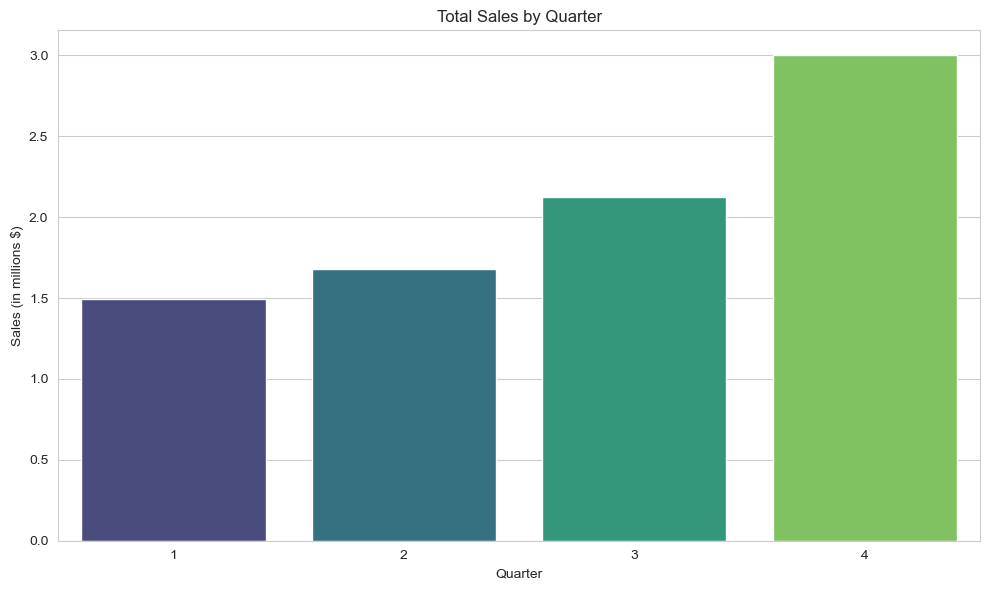

In [27]:
# Total sales by Quarter
TotalSales_by_quarter = e_commerce.groupby('Quarter')['SalesPrice'].sum().round().reset_index()

# Plot 
sns.barplot(x=TotalSales_by_quarter['Quarter'], y=TotalSales_by_quarter['SalesPrice']/1000000, palette="viridis")
plt.xlabel('Quarter')
plt.ylabel('Sales (in millions $)')
plt.title('Total Sales by Quarter')
plt.tight_layout()
plt.show()

### Observation:
+ The sales have increased progressively from Quarter 1 to Quarter 4. Quarter 4 has the highest sales amount, indicating the most significant sales performance during the year.

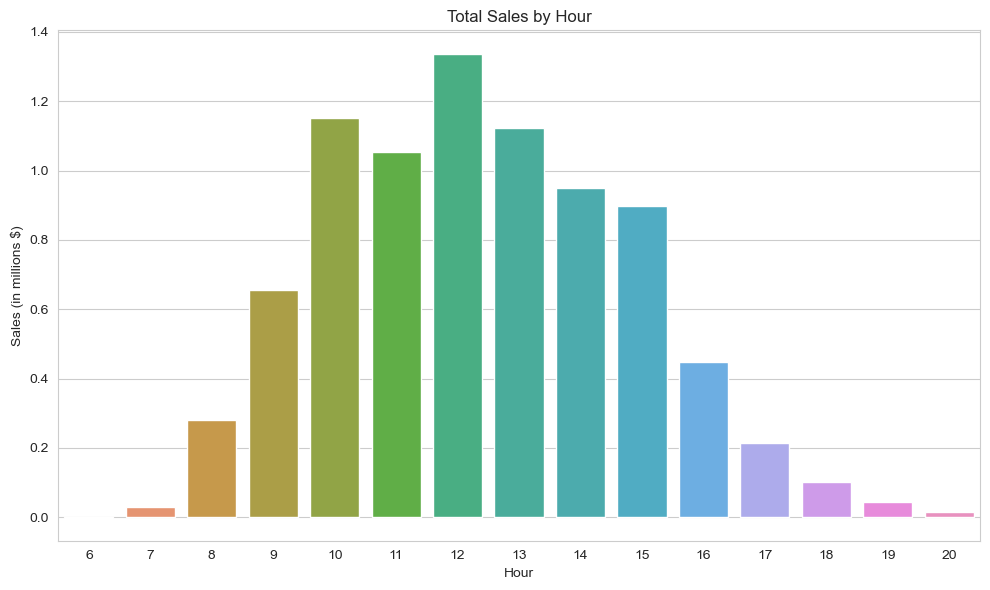

In [28]:
# Total sales by Hourly
TotalSales_by_hour = e_commerce.groupby('Hour')['SalesPrice'].sum().round().reset_index()

# Plot 
sns.barplot(x=TotalSales_by_hour['Hour'], y=TotalSales_by_hour['SalesPrice']/1000000)
plt.xlabel('Hour')
plt.ylabel('Sales (in millions $)')
plt.title('Total Sales by Hour')
plt.tight_layout()
plt.show()

### Observation:
  + Most of the sales revenues are generated between 9 a.m. and 3 p.m.

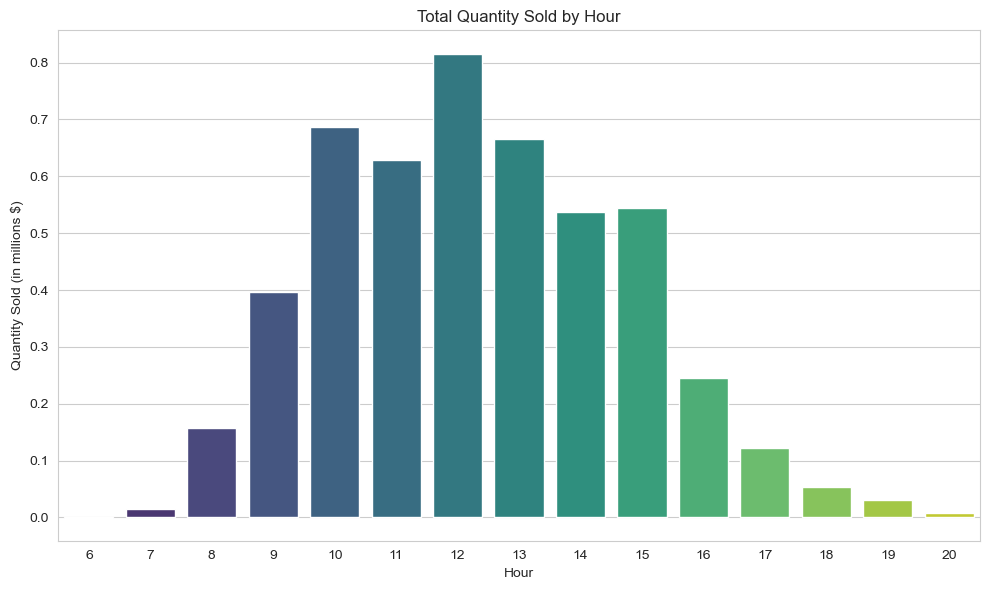

In [29]:
# Total Quantity by Hourly
Total_quantity_by_hour = e_commerce.groupby('Hour')['Quantity'].sum().round().reset_index()

# Plot 
sns.barplot(x=Total_quantity_by_hour['Hour'], y=Total_quantity_by_hour['Quantity']/1000000, palette="viridis")
plt.xlabel('Hour')
plt.ylabel('Quantity Sold (in millions $)')
plt.title('Total Quantity Sold by Hour')
plt.tight_layout()
plt.show()

### Observation:
  + Most of the transaction orders happen between 9 a.m. in the morning and 3 p.m. in the afternoon.

### Invoicing and Customer

In [30]:
# Number of unique transcations
e_commerce.InvoiceNo.nunique()

22190

In [31]:
# The most recent invoice date
e_commerce.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [32]:
# The earliest invoice date
e_commerce.InvoiceDate.min()

Timestamp('2010-12-01 08:26:00')

In [33]:
# Number of unique customers
e_commerce.CustomerID.nunique()

4372

In [34]:
customers_sales = e_commerce.groupby(['CustomerID','Description'])['SalesPrice'].sum().reset_index().sort_values(by='SalesPrice',ascending=False)
customers_sales.head(20)

,CustomerID,Description,SalesPrice
129756,15098,PICNIC BASKET WICKER 60 PIECES,39619.50
262416,18102,VINTAGE UNION JACK MEMOBOARD,16592.08
177709,16210,BLACK RECORD COVER FRAME,16027.92
262438,18102,WOOD BLACK BOARD ANT WHITE FINISH,15351.00
262305,18102,CREAM HEART CARD HOLDER,14089.90
128488,15061,REGENCY CAKESTAND 3 TIER,14081.70
232549,17450,HEART OF WICKER LARGE,13427.64
232623,17450,WHITE HANGING HEART T-LIGHT HOLDER,13253.84
77201,14096,DOTCOM POSTAGE,11906.36
232613,17450,SET OF TEA COFFEE SUGAR TINS PANTRY,10566.73


### Observation:
The results give useful information about the best-selling products and top contributing customers to sales revenue. This can help to identify popular products and customer preferences, guiding marketing, inventory management, and business strategies to increase sales and revenue. Focusing on high-revenue generating products and customers can also improve customer satisfaction and profitability.

In [35]:
customers_quantity = e_commerce.groupby(['CustomerID','Description'])['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)
customers_quantity.head(20)

,CustomerID,Description,Quantity
42855,13256,ASSTD DESIGN 3D PAPER STICKERS,12540
182464,16333,WORLD WAR 2 GLIDERS ASSTD DESIGNS,10080
186429,16422,BROCADE RING PURSE,10077
256615,17949,POPCORN HOLDER,9292
182462,16333,RED HARMONICA IN BOX,8120
181469,16308,SMALL CHINESE STYLE SCISSOR,8000
224954,17306,PACK OF 12 LONDON TISSUES,6624
262305,18102,CREAM HEART CARD HOLDER,5946
27897,12901,WORLD WAR 2 GLIDERS ASSTD DESIGNS,5712
104558,14609,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,5586


### Observation:
+ These results provide valuable insights into the purchasing behavior of top customers and highlight the customers who have made significant and large-scale purchases. This information can be used to identify key customers, understand their preferences, and plan targeted marketing strategies to retain loyal customers and attract new ones. Additionally, it can also indicate the popularity of products or items among customers, potentially guiding decisions related to inventory management and stock availability.

In [36]:
customers_country = e_commerce.groupby('Country')['CustomerID'].nunique().reset_index().sort_values(by='CustomerID',ascending=False)
customers_country.rename(columns={'CustomerID':'Customer_Count'}, inplace=True)
customers_country = customers_country.head(10)
customers_country

,Country,Customer_Count
35,United Kingdom,3950
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,15
12,Finland,12
1,Austria,11


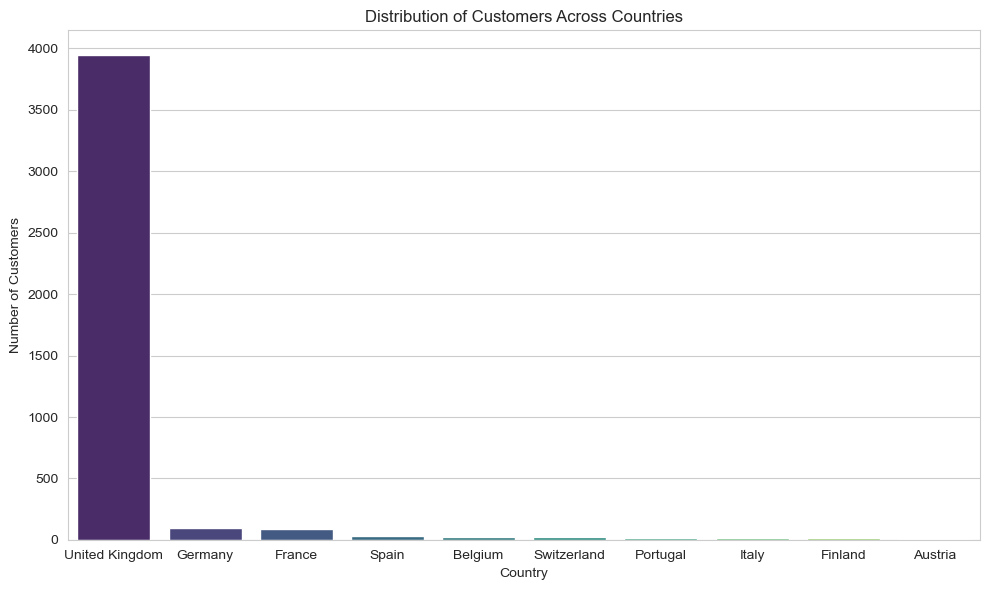

In [37]:
# Plot 
sns.barplot(x=customers_country['Country'], y=customers_country['Customer_Count'], palette="viridis")
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Across Countries')
plt.tight_layout()
plt.show()

# Observation: Distribution of customers across different countries. 
+ UK has the most customers, followed by Germany and France. Austria has the lowest number of customers among the top 10.

In [38]:
invoice_country = e_commerce.groupby('Country')['InvoiceNo'].nunique().reset_index().sort_values(by='InvoiceNo',ascending=False).head(10)
invoice_country.rename(columns={'InvoiceNo':'Invoice_Count'}, inplace=True)
invoice_country

,Country,Invoice_Count
35,United Kingdom,19857
14,Germany,603
13,France,458
10,EIRE,319
3,Belgium,119
30,Spain,105
23,Netherlands,101
32,Switzerland,71
26,Portugal,70
0,Australia,69


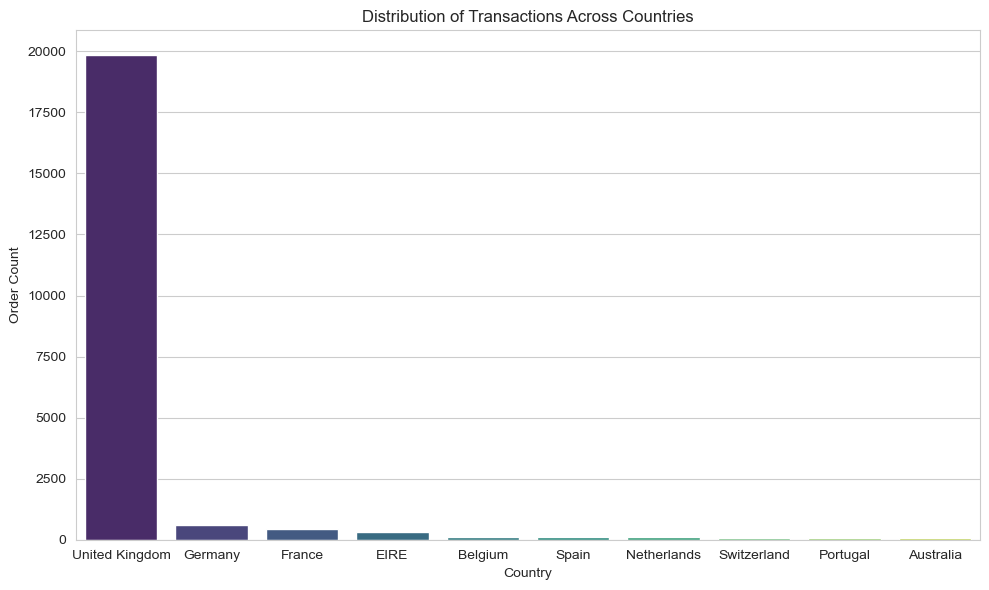

In [39]:
# Plot 
sns.barplot(x=invoice_country['Country'], y=invoice_country['Invoice_Count'], palette="viridis")
plt.xlabel('Country')
plt.ylabel('Order Count')
plt.title('Distribution of Transactions Across Countries')
plt.tight_layout()
plt.show()

### Observation: Distribution of transactions across different countries.

+ UK has the most transactions, followed by Germany and France. Australia has the lowest number of transactions among the top 10.

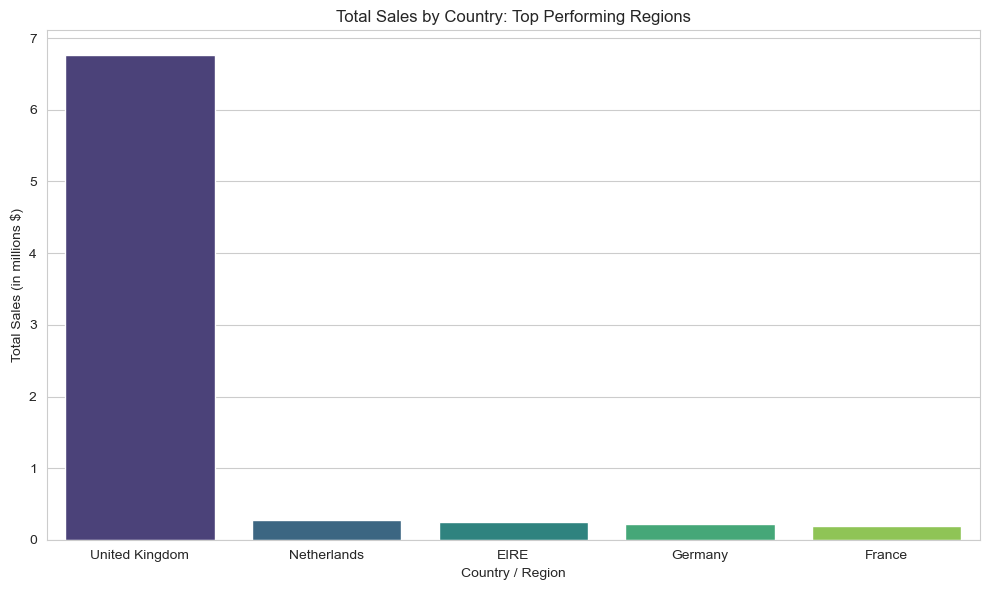

In [40]:
# Group Country by total sales 
country_sales = e_commerce.groupby('Country')['SalesPrice'].sum().reset_index().sort_values('SalesPrice',ascending=False).head()

# Plot 
sns.barplot(x=country_sales['Country'], y=country_sales['SalesPrice']/1000000, palette="viridis")
plt.xlabel('Country / Region')
plt.ylabel('Total Sales (in millions $)')
plt.title('Total Sales by Country: Top Performing Regions')
plt.tight_layout()
plt.show()

### Observation: Top-performing countries in terms of sales revenue.
+ UK has highest sales revenue, Netherlands is second and France is fifth.

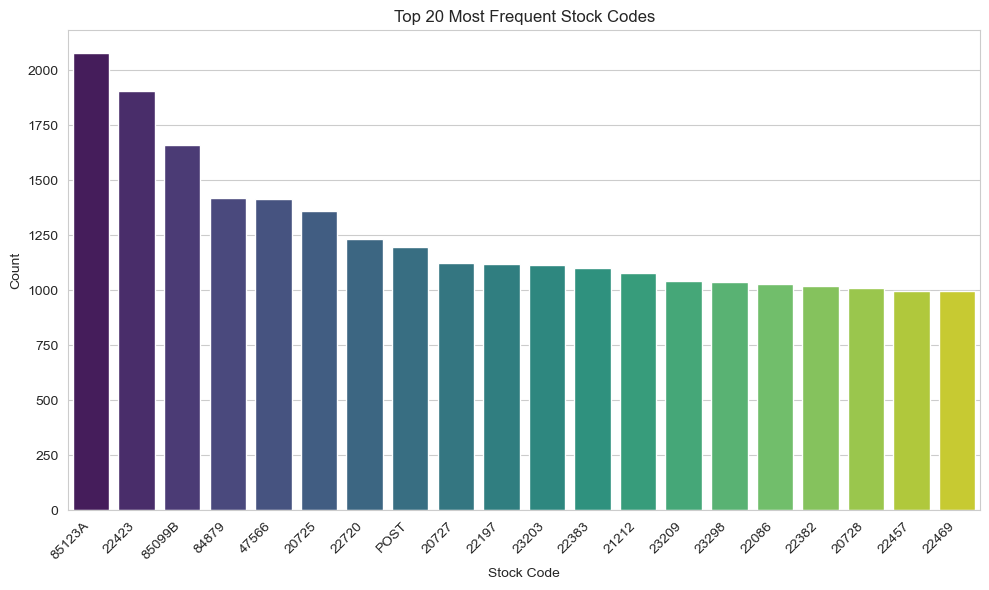

In [41]:
# Value count of 'StockCode'
stockcode_counts = e_commerce['StockCode'].value_counts().head(20)

# Plot
sns.barplot(x=stockcode_counts.index, y=stockcode_counts.values, palette="viridis")
plt.xlabel('Stock Code')
plt.ylabel('Count')
plt.title('Top 20 Most Frequent Stock Codes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


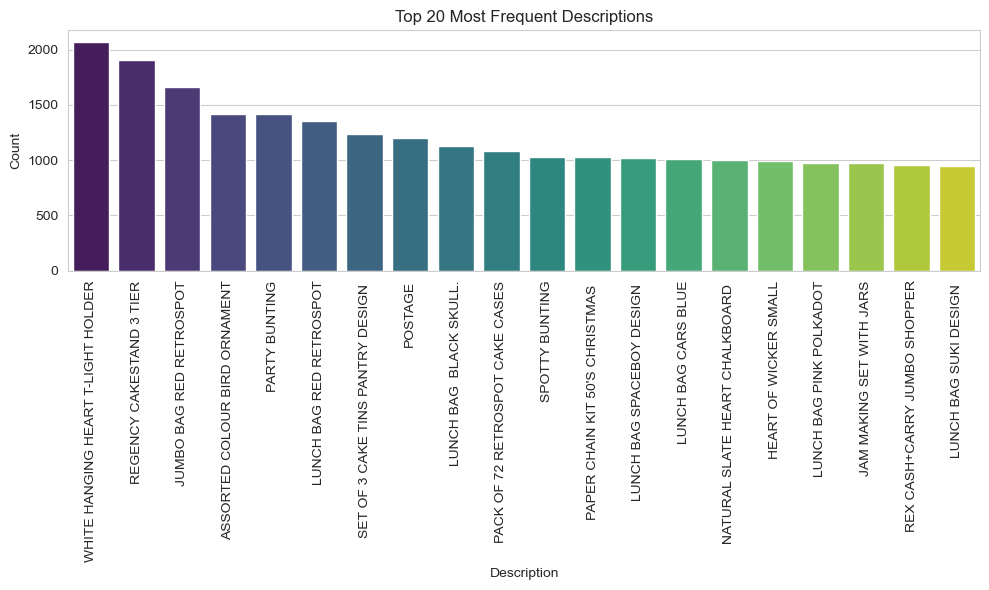

In [42]:
# Value count of 'Description'
description_count = e_commerce['Description'].value_counts().head(20)

# Plot
sns.barplot(x=description_count.index, y=description_count.values, palette="viridis")
plt.xlabel('Description')
plt.ylabel('Count')
plt.title('Top 20 Most Frequent Descriptions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()